<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#34b454;overflow:hidden;font-weight:800">Extramarital Affairs</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fairs-extramarital-affairs-data/Affairs.csv


## <b><div style='padding:15px;background-color:#34b454;color:white;border-radius:2px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**Description**

Infidelity data, known as Fair's Affairs. Cross-section data from a survey conducted by Psychology Today in 1969.

**Format**

A data frame containing 601 observations on 9 variables.

**affairs**

numeric. How often engaged in extramarital sexual intercourse during the past year? 0 = none, 1 = once, 2 = twice, 3 = 3 times, 7 = 4–10 times, 12 = monthly, 12 = weekly, 12 = daily.

**gender**

factor indicating gender.

**age**

numeric variable coding age in years: 17.5 = under 20, 22 = 20–24, 27 = 25–29, 32 = 30–34, 37 = 35–39, 42 = 40–44, 47 = 45–49, 52 = 50–54, 57 = 55 or over.

**yearsmarried**

numeric variable coding number of years married: 0.125 = 3 months or less, 0.417 = 4–6 months, 0.75 = 6 months–1 year, 1.5 = 1–2 years, 4 = 3–5 years, 7 = 6–8 years, 10 = 9–11 years, 15 = 12 or more years.

**children**

factor. Are there children in the marriage?

**religiousness**

numeric variable coding religiousness: 1 = anti, 2 = not at all, 3 = slightly, 4 = somewhat, 5 = very.

**education**

numeric variable coding level of education: 9 = grade school, 12 = high school graduate, 14 = some college, 16 = college graduate, 17 = some graduate work, 18 = master's degree, 20 = Ph.D., M.D., or other advanced degree.

**occupation**

numeric variable coding occupation according to Hollingshead classification (reverse numbering).

**rating**

numeric variable coding self rating of marriage: 1 = very unhappy, 2 = somewhat unhappy, 3 = average, 4 = happier than average, 5 = very happy.

## <b><div style='padding:15px;background-color:#34b454;color:white;border-radius:2px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <b><div style='padding:15px;background-color:#34b454;color:white;border-radius:2px;font-size:110%;text-align: center'>3  |  Dataset</div></b>

In [3]:
df = pd.read_csv('/kaggle/input/fairs-extramarital-affairs-data/Affairs.csv')
df.head().T

,0,1,2,3,4
Unnamed: 0,4,5,11,16,23
affairs,0,0,0,0,0
gender,male,female,female,male,male
age,37.0,27.0,32.0,57.0,22.0
yearsmarried,10.0,4.0,15.0,15.0,0.75
children,no,no,yes,yes,no
religiousness,3,4,1,5,2
education,18,14,12,18,17
occupation,7,6,1,6,6
rating,4,4,4,5,3


## <b><div style='padding:15px;background-color:#34b454;color:white;border-radius:2px;font-size:110%;text-align: center'>4  |  Inspecting Dataframe Structure</div></b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     601 non-null    int64  
 1   affairs        601 non-null    int64  
 2   gender         601 non-null    object 
 3   age            601 non-null    float64
 4   yearsmarried   601 non-null    float64
 5   children       601 non-null    object 
 6   religiousness  601 non-null    int64  
 7   education      601 non-null    int64  
 8   occupation     601 non-null    int64  
 9   rating         601 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 47.1+ KB


In [5]:
# Delete column "Unnamed: 0"

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
# Converting object columns to numeric - "LabelEncoder"

from sklearn.preprocessing import LabelEncoder

# instantiate encoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int64  
 1   gender         601 non-null    int64  
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    int64  
 5   religiousness  601 non-null    int64  
 6   education      601 non-null    int64  
 7   occupation     601 non-null    int64  
 8   rating         601 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.4 KB


In [8]:
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,1,37.0,10.00,0,3,18,7,4
1,0,0,27.0,4.00,0,4,14,6,4
2,0,0,32.0,15.00,1,1,12,1,4
3,0,1,57.0,15.00,1,5,18,6,5
4,0,1,22.0,0.75,0,2,17,6,3


In [9]:
# function to define figure 
def figure_size():
    f = plt.figure()
    f.set_figwidth(7)
    f.set_figheight(5)
    font = {'family' : 'normal','size'   : 20}

<Figure size 700x500 with 0 Axes>

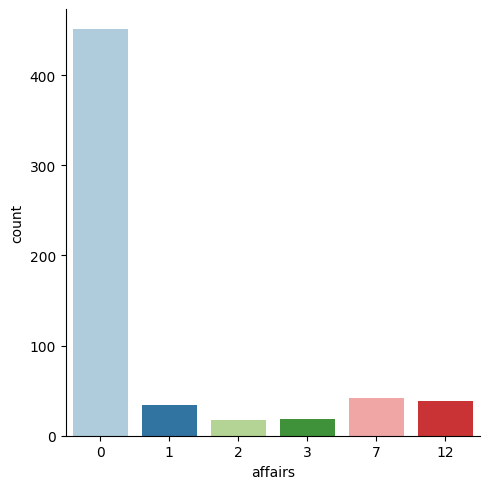

In [10]:
# Affairs - Count

figure_size()
sns.catplot(x='affairs',data = df,kind = 'count',palette = 'Paired')
plt.show()

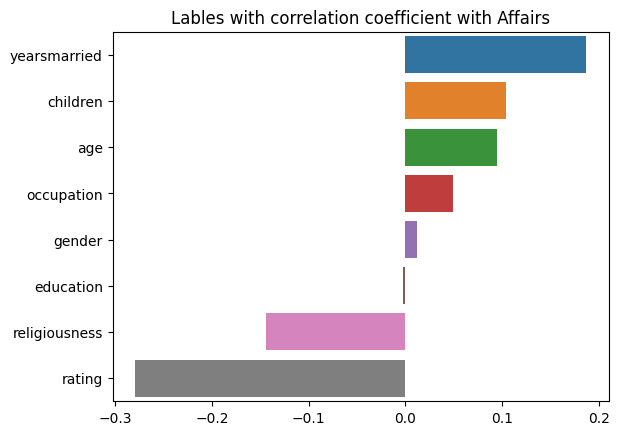

In [11]:
# Correlation Coefficient whith 'Affairs'

THRESHOLD = -1.00

data = df.corr()["affairs"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>THRESHOLD:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Lables with correlation coefficient with Affairs')

plt.show()

## <b><div style='padding:15px;background-color:#34b454;color:white;border-radius:2px;font-size:110%;text-align: center'>5  |  EDA
</div></b>

**Let's evaluate all the variables starting with 'affairs' and then the relationship of 'affairs' with the other variables.**

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#34b454'> Affairs</span></b> 

**How often engaged in extramarital sexual intercourse during the past year? 0 = none, 1 = once, 2 = twice, 3 = 3 times, 7 = 4–10 times, 12 = monthly, 12 = weekly, 12 = daily.**

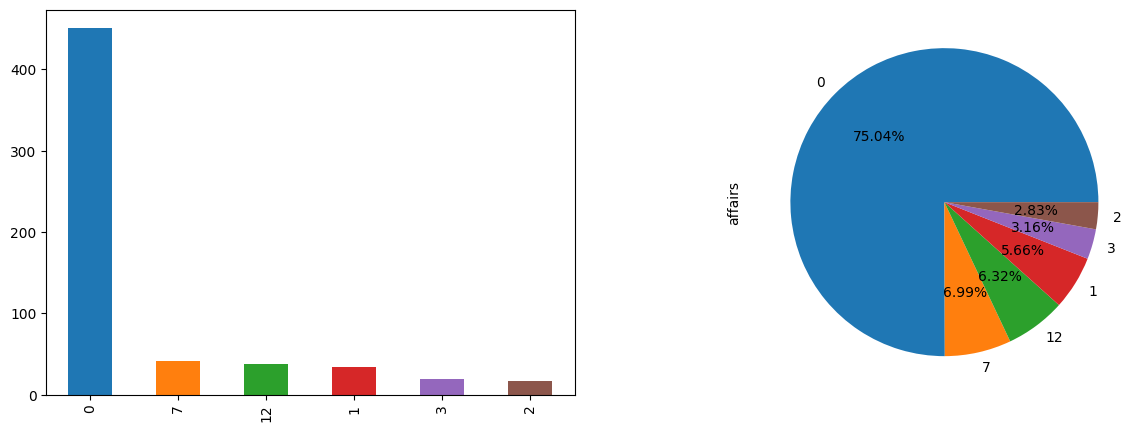

In [12]:
# Affairs
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['affairs'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
df['affairs'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

<div class="alert alert-block alert-info" style="background-color:#b9ebf6;color:#34b454;border-color:black;width:80%;margin: auto;text-align: center"><b>Insight:</b> We can see that 75% did not have extramarital relations in the last year. The other groups shared the remaining 25%.</div>

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#34b454'> Affairs X Gender</span></b> 

**Gender: 1 = Male, 2 = Female**

<AxesSubplot: xlabel='gender', ylabel='affairs'>

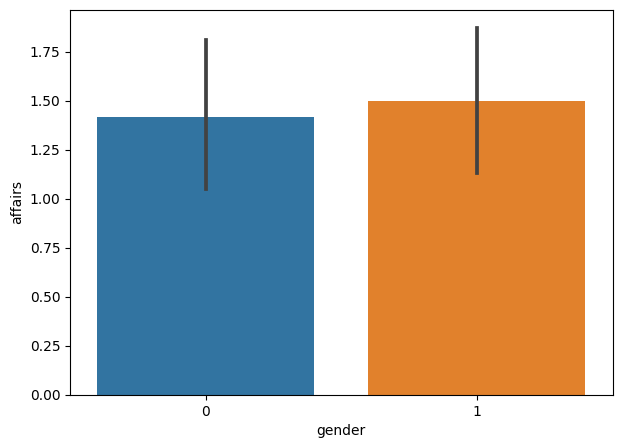

In [13]:
# Affairs X Gender

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=df['gender'], y=df['affairs'])


<div class="alert alert-block alert-info" style="background-color:#b9ebf6;color:#34b454;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight:</b> We can see that the male sex has a little more affairs than the female, but not very significant.</div>

### <b><span style='color:#DEB078'>5.3 |</span><span style='color:#34b454'> Affairs X Age</span></b> 

**Numeric variable coding age in years: 17.5 = under 20, 22 = 20–24, 27 = 25–29, 32 = 30–34, 37 = 35–39, 42 = 40–44, 47 = 45–49, 52 = 50–54, 57 = 55 or over.**

<AxesSubplot: xlabel='age', ylabel='affairs'>

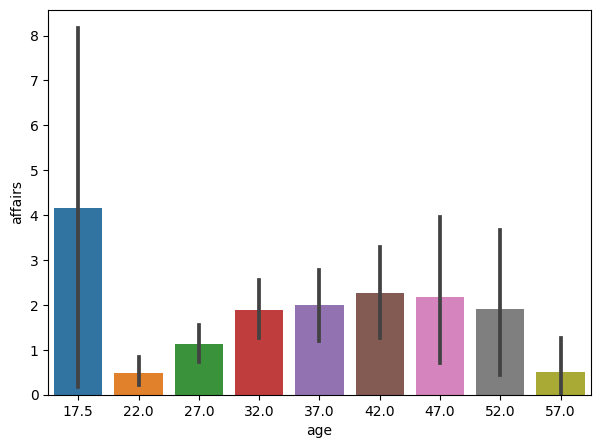

In [14]:
# Affairs X Age

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=df['age'], y=df['affairs'])

<div class="alert alert-block alert-info" style="background-color:#b9ebf6;color:#34b454;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight:</b> The age group with the most affairs is in the group "17.5 = under 20 years" and the smallest in groups "22.0 = 20-24 years" and "57 = 55 years or over ".</div>

### <b><span style='color:#DEB078'>5.4 |</span><span style='color:#34b454'> Affairs X Years Married</span></b> 

**Number of years married: 0.125 = 3 months or less, 0.417 = 4–6 months, 0.75 = 6 months–1 year, 1.5 = 1–2 years, 4 = 3–5 years, 7 = 6–8 years, 10 = 9–11 years, 15 = 12 or more years.**

<AxesSubplot: xlabel='yearsmarried', ylabel='affairs'>

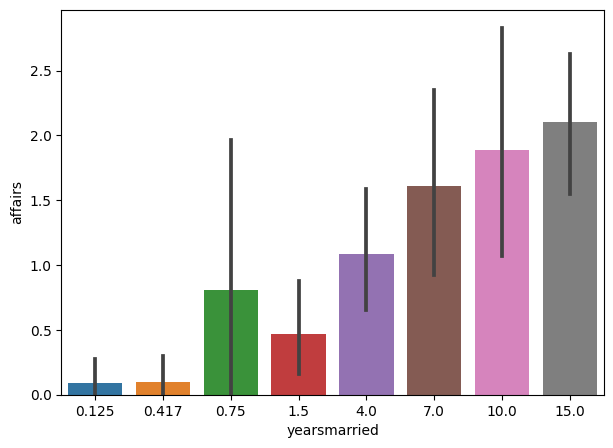

In [15]:
# Affairs X yearsmarried

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=df['yearsmarried'], y=df['affairs'])

<div class="alert alert-block alert-info" style="background-color:#b9ebf6;color:#34b454;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight:</b> With the exception of group 1.5, there is an increase in affairs as the number of years married increases.</div>

### <b><span style='color:#DEB078'>5.5 |</span><span style='color:#34b454'> Affairs X Children</span></b> 

**Are there children in the marriage? no = 0, yes = 1.**

<AxesSubplot: xlabel='children', ylabel='affairs'>

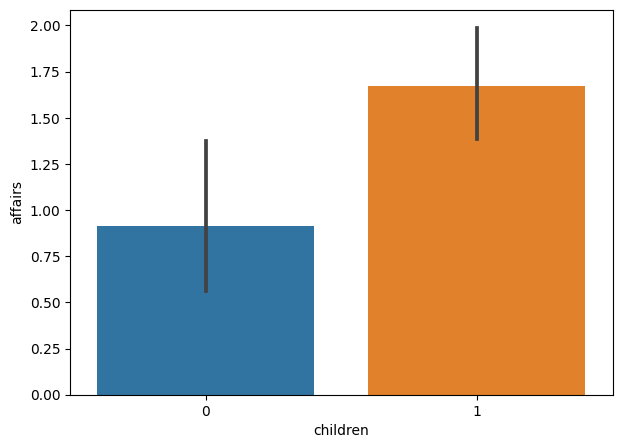

In [16]:
# Affairs X yearsmarried

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=df['children'], y=df['affairs'])

<div class="alert alert-block alert-info" style="background-color:#b9ebf6;color:#34b454;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight:</b> Couples that have children have a higher incidence of affairs.</div>

### <b><span style='color:#DEB078'>5.6 |</span><span style='color:#34b454'> Affairs X Religiousness</span></b> 

**Religiousness: 1 = anti, 2 = not at all, 3 = slightly, 4 = somewhat, 5 = very.**

<AxesSubplot: xlabel='religiousness', ylabel='affairs'>

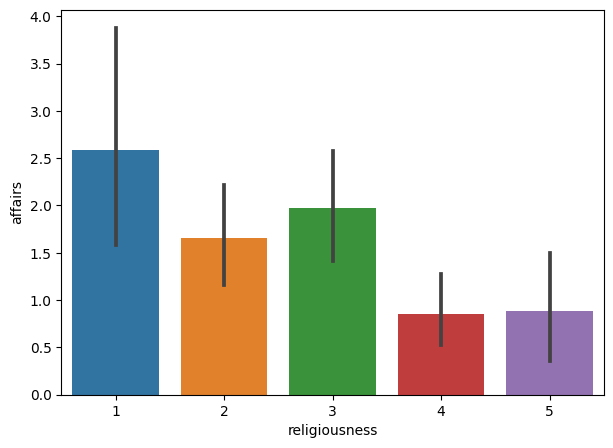

In [17]:
# Affairs X religiousness

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=df['religiousness'], y=df['affairs'])

<div class="alert alert-block alert-info" style="background-color:#b9ebf6;color:#34b454;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight:</b> The most religious groups (4 and 5) have a lower rate of affairs.</div>

## <b><span style='color:#DEB078'>5.7 |</span><span style='color:#34b454'> Affairs X Education</span></b> 

**Level of education: 9 = grade school, 12 = high school graduate, 14 = some college, 16 = college graduate, 17 = some graduate work, 18 = master's degree, 20 = Ph.D., M.D., or other advanced degree.**

<AxesSubplot: xlabel='education', ylabel='affairs'>

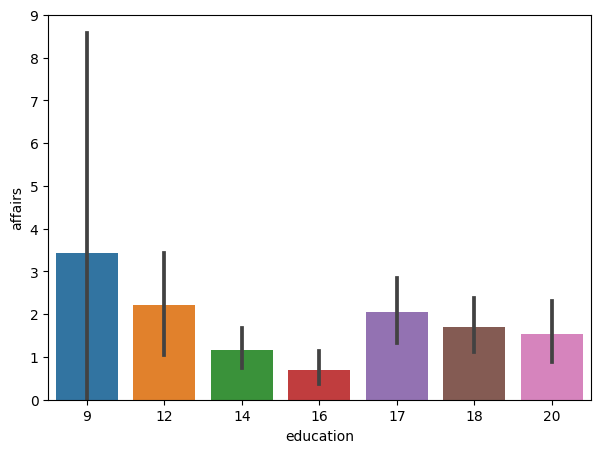

In [18]:
# Affairs X education

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=df['education'], y=df['affairs'])

<div class="alert alert-block alert-info" style="background-color:#b9ebf6;color:#34b454;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight:</b> There is no clear relationship between education and affairs, but we can see that the group with less education has a greater number of affairs.</div>

## <b><span style='color:#DEB078'>5.8 |</span><span style='color:#34b454'> Affairs X Occupation</span></b> 

**Occupation according to Hollingshead classification (reverse numbering).**

<AxesSubplot: xlabel='occupation', ylabel='affairs'>

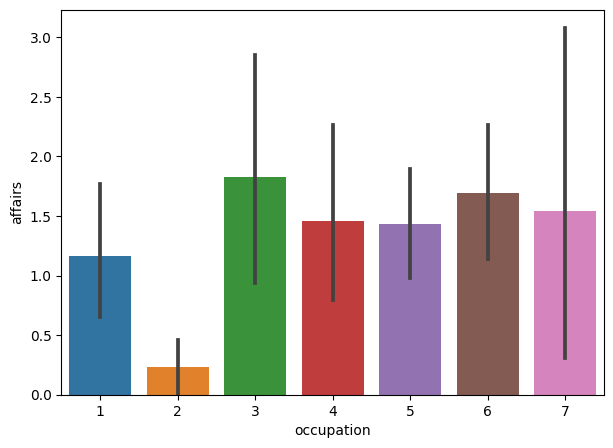

In [19]:
# Affairs X occupation

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=df['occupation'], y=df['affairs'])

<div class="alert alert-block alert-info" style="background-color:#b9ebf6;color:#34b454;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight:</b> There is no clear relationship between occupation and affairs, but we can see that the group "2" has lower number of affairs.</div>

## <b><span style='color:#DEB078'>5.9 |</span><span style='color:#34b454'> Affairs X Rating</span></b> 

**Rating of marriage: 1 = very unhappy, 2 = somewhat unhappy, 3 = average, 4 = happier than average, 5 = very happy.**

<AxesSubplot: xlabel='rating', ylabel='affairs'>

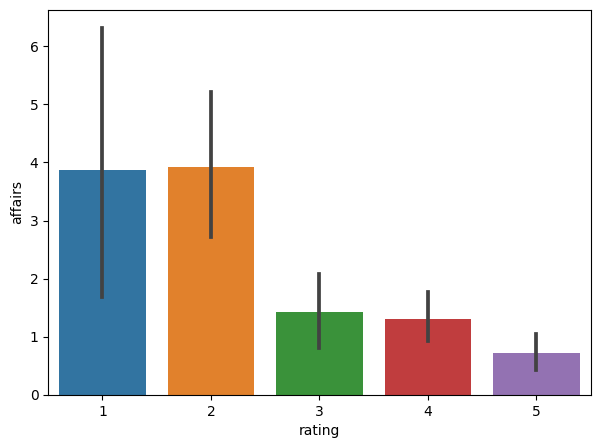

In [20]:
# Affairs X rating

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=df['rating'], y=df['affairs'])

<div class="alert alert-block alert-info" style="background-color:#b9ebf6;color:#34b454;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight:</b> We can conclude that the groups (3, 4 and 5) that are happier with marriage have a smaller number of affairs and vice versa (1 and 2).</div>

## <b><span style='color:#DEB078'>5.10 |</span><span style='color:#34b454'> Heatmap</span></b>

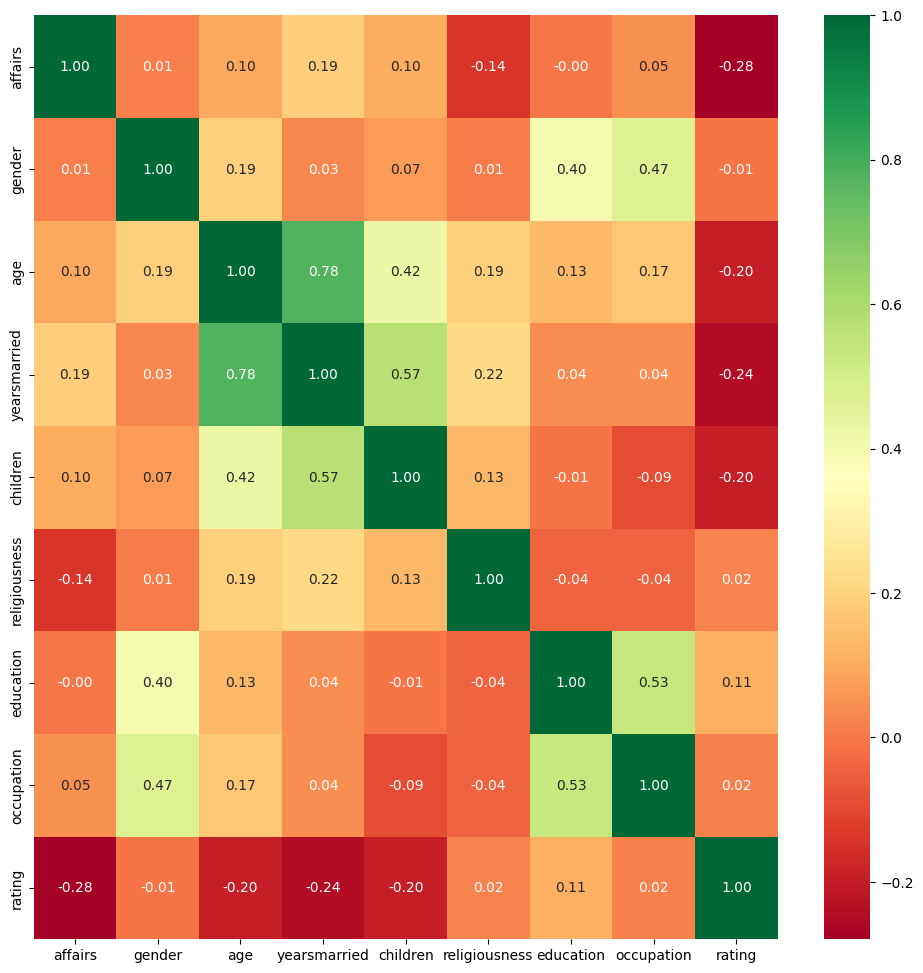

In [21]:
# Check correlation

df_corr = df.corr()
f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 10}, ax=ax)
plt.show()

## <b><div style='padding:15px;background-color:#34b454;color:white;border-radius:2px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>